In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [10]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df = df.drop(['petal length (cm)','petal width (cm)'],axis='columns')
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

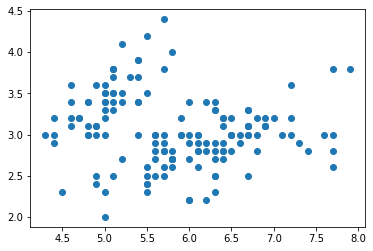

In [12]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])

In [15]:
km = KMeans(n_clusters = 3)
y_p = km.fit_predict(df[['sepal length (cm)','sepal width (cm)']])
df['cluster'] = y_p
df.head()

,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2


In [28]:
df.cluster.unique()

array([2, 1, 0])

In [29]:
km.cluster_centers_

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

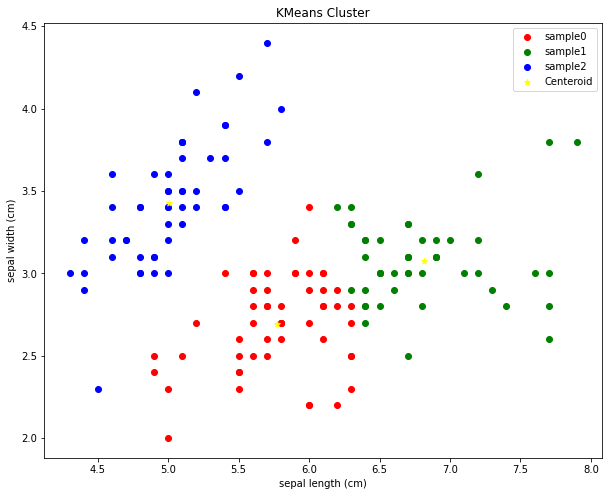

In [39]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]


plt.figure(figsize=(10,8))

plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red',label='sample0')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green',label='sample1')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='blue',label='sample2')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='*',label='Centeroid')

plt.title('KMeans Cluster')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.legend()

In [40]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    kk = KMeans(n_clusters=k)
    kk.fit(df[['sepal length (cm)','sepal width (cm)']])
    sse.append(kk.inertia_)

C:\Users\khanm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


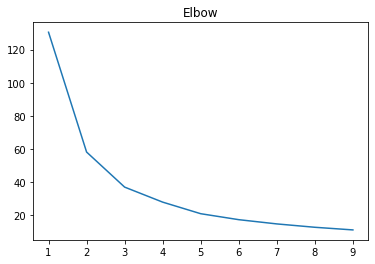

In [42]:
plt.title('Elbow')
plt.plot(k_rng,sse)